## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_2003-0204-23.csv', firstRow=222, lastRow=228)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_270323_S223-228.csv',t_baseline=30,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=84s and ended at t=492s; mass=44.39665g
This equals a volume of 44.486m; expected was 45.166mL; error is 1.506%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0010000000000000002 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


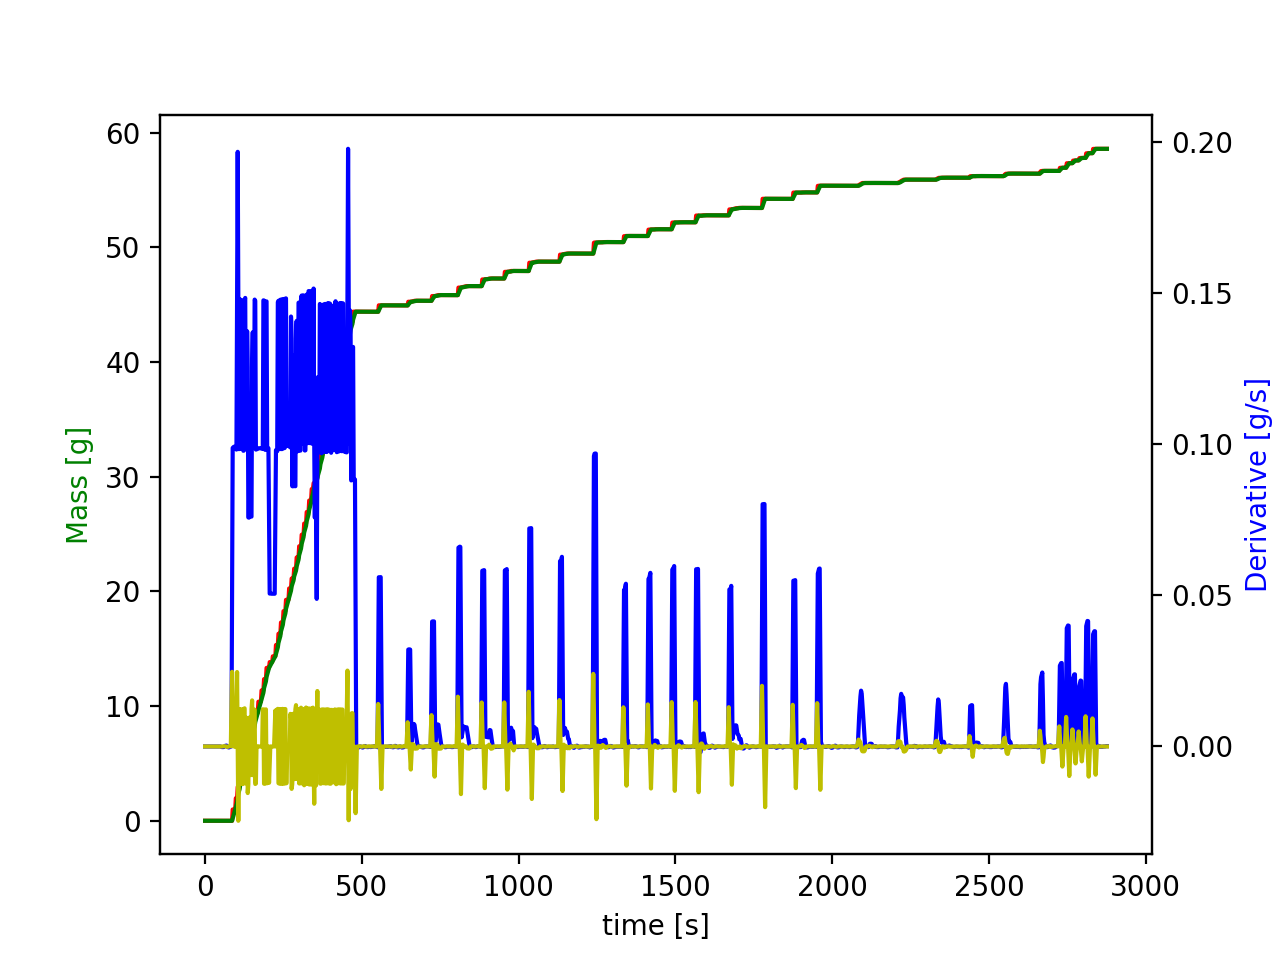

Addition of 0.557g Texapon SB 3 KC detected from 548s to 568s - expected volume = 0.902mL and actual volume = 0.502mL (resulting error is 44.326%)
Addition of 0.408g Plantapon LC 7 detected from 642s to 682s - expected volume = 0.516mL and actual volume = 0.388mL (resulting error is 24.793%)
Addition of 0.498g Plantapon LC 7 detected from 718s to 758s - expected volume = 0.516mL and actual volume = 0.473mL (resulting error is 8.24%)
Addition of 0.787g Plantapon LC 7 detected from 802s to 848s - expected volume = 0.842mL and actual volume = 0.745mL (resulting error is 11.584%)
Addition of 0.665g Plantapon LC 7 detected from 878s to 922s - expected volume = 0.604mL and actual volume = 0.629mL (resulting error is 4.003%)
Addition of 0.66g Plantapon LC 7 detected from 950s to 990s - expected volume = 0.604mL and actual volume = 0.624mL (resulting error is 3.19%)
Addition of 0.819g Plantapon LC 7 detected from 1028s to 1070s - expected volume = 0.811mL and actual volume = 0.77mL (resulting 

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


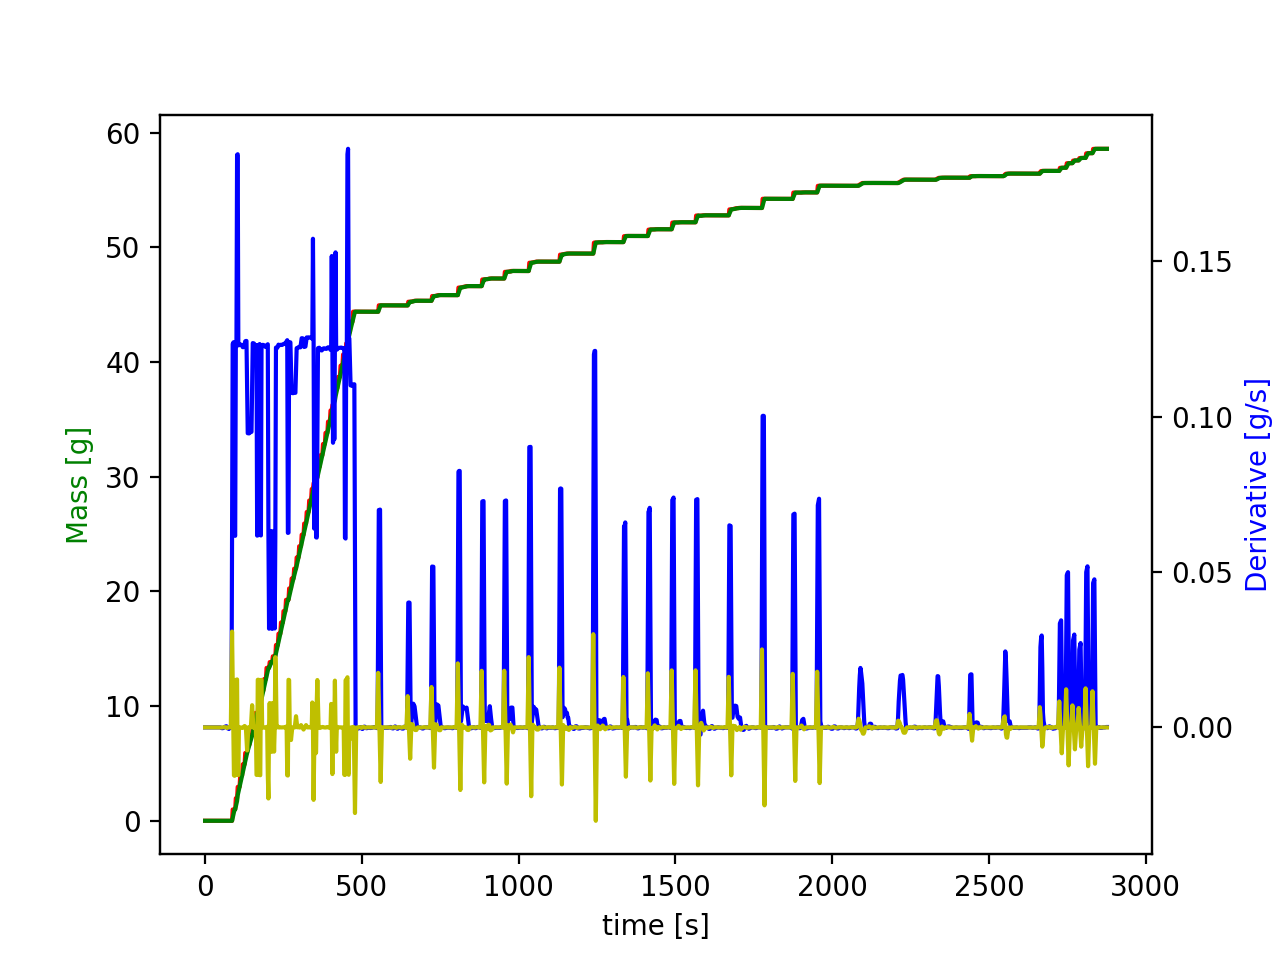

Addition of 0.251g Luviquat Excellence detected from 2078s to 2130s - expected volume = 0.256mL and actual volume = 0.228mL (resulting error is 10.587%)
Addition of 0.293g Luviquat Excellence detected from 2206s to 2240s - expected volume = 0.265mL and actual volume = 0.262mL (resulting error is 1.305%)
Addition of 0.178g Luviquat Excellence detected from 2326s to 2362s - expected volume = 0.159mL and actual volume = 0.162mL (resulting error is 2.0%)
Addition of 0.145g Luviquat Excellence detected from 2434s to 2470s - expected volume = 0.129mL and actual volume = 0.131mL (resulting error is 2.113%)
Addition of 0.221g Luviquat Excellence detected from 2542s to 2572s - expected volume = 0.204mL and actual volume = 0.2mL (resulting error is 1.667%)
Addition of 0.242g Luviquat Excellence detected from 2658s to 2682s - expected volume = 0.222mL and actual volume = 0.218mL (resulting error is 2.024%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=7, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


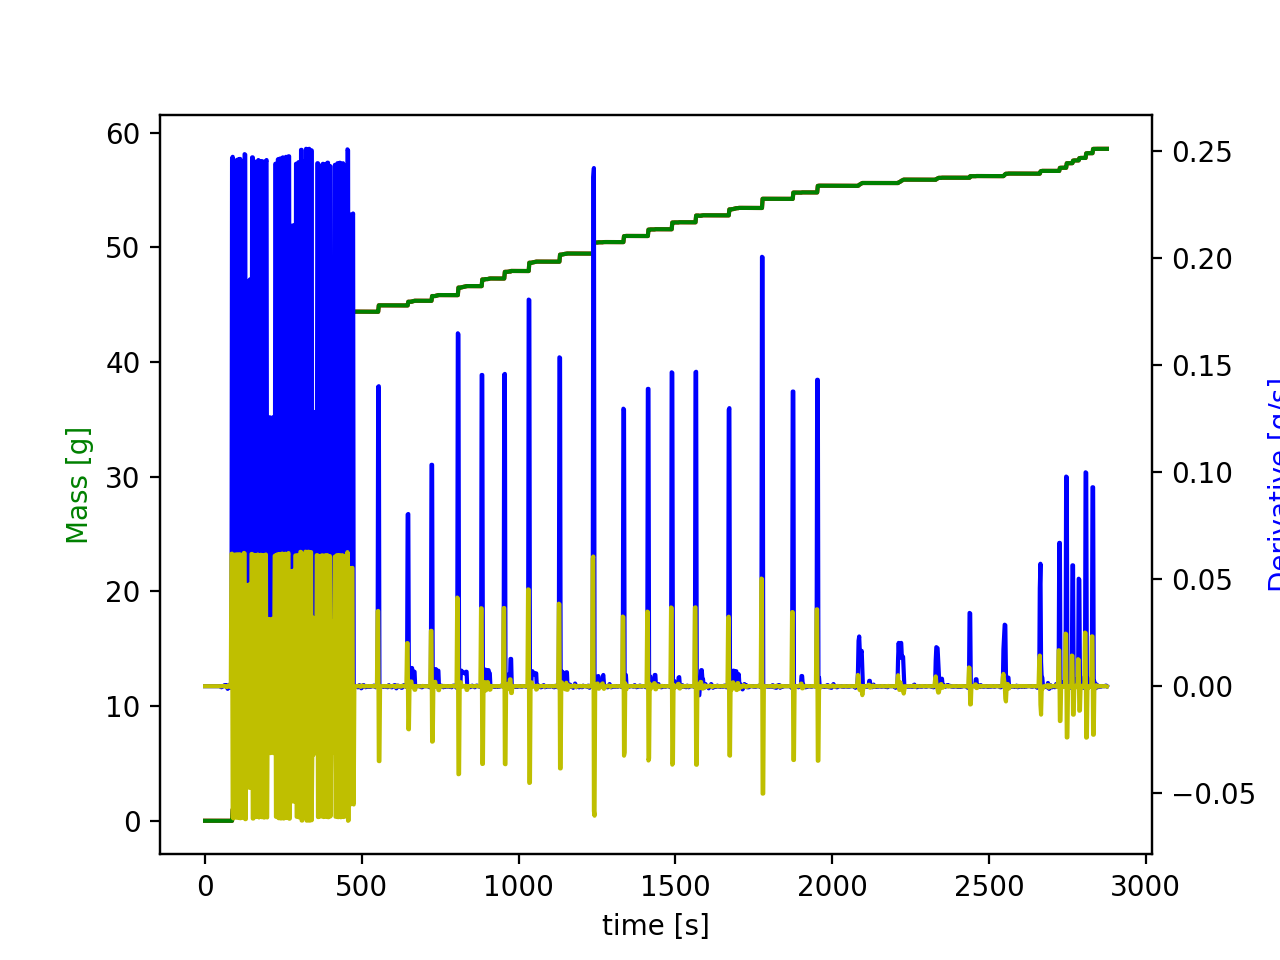

Addition of 0.275g Arlypon F detected from 2720s to 2732s - expected volume = 0.312mL and actual volume = 0.315mL (resulting error is 1.103%)
Addition of 0.399g Arlypon F detected from 2742s to 2754s - expected volume = 0.431mL and actual volume = 0.449mL (resulting error is 4.178%)
Addition of 0.235g Arlypon F detected from 2762s to 2774s - expected volume = 0.248mL and actual volume = 0.269mL (resulting error is 8.525%)
Addition of 0.218g Arlypon F detected from 2782s to 2796s - expected volume = 0.235mL and actual volume = 0.249mL (resulting error is 6.068%)
Addition of 0.413g Arlypon F detected from 2804s to 2816s - expected volume = 0.449mL and actual volume = 0.471mL (resulting error is 4.822%)
Addition of 0.38g Arlypon F detected from 2826s to 2838s - expected volume = 0.409mL and actual volume = 0.431mL (resulting error is 5.263%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_270323_S223-S228.csv', index=False)
actualMassFractions